In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import colors
import os, copy
from PIL import Image

In [ ]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight)

class NN(nn.Module):

    def __init__(self, activation=nn.Tanh, num_neurons=16, num_layers=9):
        super(NN, self).__init__()
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


def gen_new_image(size_x, size_y, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    colors = run_net(net, size_x, size_y)
    plot_colors(colors)
    if save is True:
        save_colors(colors)
    return net, colors


def run_net(net, size_x=64, size_y=64):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - 0.5, float(j) / size_x - 0.5])
    colors = colors.reshape(size_x * size_y, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)


def plot_colors(colors, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)


def save_colors(colors):
    plt.imsave(str(np.random.randint(10000)) + ".png", colors)


def run_plot_save(net, size_x, size_y, fig_size=8):
    colors = run_net(net, size_x, size_y)
    plot_colors(colors, fig_size)
    save_colors(colors)

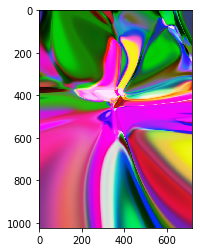

In [ ]:
n,c = gen_new_image(1024, 720, save=False, num_neurons=16)

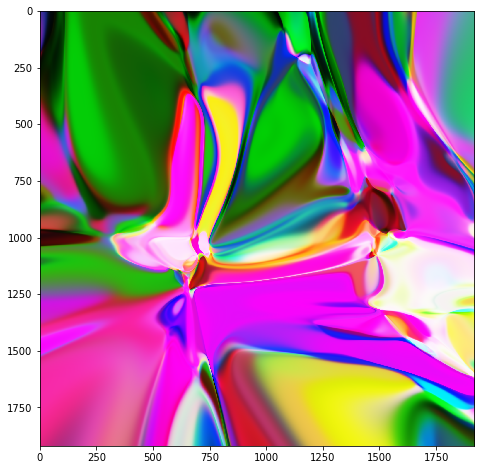

In [ ]:
run_plot_save(n, 1920, 1920)

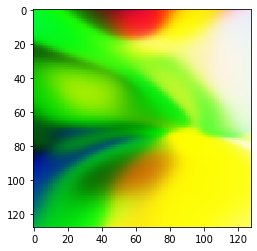

In [ ]:

n,c = gen_new_image(128, 128, save=False, num_layers=4)